In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/HAPT Data Set"

Mounted at /content/drive
/content/drive/MyDrive/HAPT Data Set


In [ ]:
%pwd

'/content/drive/MyDrive/HAPT Data Set'

In [2]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')
subject_id_train = pd.read_csv('subject_id_train.txt',header=None)
subject_id_test = pd.read_csv('subject_id_test.txt',header=None)
train_data = pd.concat([x_train,y_train],axis=1)
#subject_id_train.columns = ['subject_id']
#subject_id_test.columns = ['subject_id']
#train_data = pd.concat([train_data,subject_id_train],axis=1)
train_data.columns = train_data.columns.str.rstrip()
badChars = [' ']
newColumnNames = []
for colName in train_data.columns:
  newColName = ''.join(i for i in colName if i not in badChars)
  newColumnNames.append(newColName)
train_data.columns = newColumnNames
x_test.columns = x_test.columns.str.rstrip()

x_train = train_data.drop('Label',axis=1)
y_train = train_data['Label']

mappings = {"WALKING":1,
              "WALKING_UPSTAIRS":2,
              "WALKING_DOWNSTAIRS":3,
              "SITTING":4,
              "STANDING":5,
              "LAYING":6,
              "STAND_TO_SIT":7,
              "SIT_TO_STAND":8, 
              "SIT_TO_LIE":9, 
              "LIE_TO_SIT":10,
              "STAND_TO_LIE":11,
              "LIE_TO_STAND":12}
y_train = y_train.map(mappings)
y_test = y_test['Label'].map(mappings)

ll = []
for colName in x_test.columns:
  newcolname = ''.join(i for i in colName if i not in badChars)
  ll.append(newcolname)
x_test.columns = ll


In [ ]:
train_outcome = pd.crosstab(index=train_data["Label"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0               count
Label                    
LAYING               1413
LIE_TO_SIT             60
LIE_TO_STAND           57
SITTING              1293
SIT_TO_LIE             75
SIT_TO_STAND           23
STANDING             1423
STAND_TO_LIE           90
STAND_TO_SIT           47
WALKING              1226
WALKING_DOWNSTAIRS    987
WALKING_UPSTAIRS     1073

We realise that there are class imbalances, especially for transitive classes. We need to upsample these classes to get a more cohesive dataset

In [ ]:
balanced_x_train = pd.read_csv('x_train_upsampled.csv')
balanced_y_train = pd.read_csv('y_train_upsampled.csv')

balanced_train_data = pd.concat([balanced_x_train,balanced_y_train],axis=1)
balanced_train_data.columns = balanced_train_data.columns.str.rstrip()
badChars = [' ']
newColumnNames = []
for colName in train_data.columns:
  newColName = ''.join(i for i in colName if i not in badChars)
  newColumnNames.append(newColName)
balanced_train_data.columns = newColumnNames

balanced_x_train = balanced_train_data.drop('Label',axis=1)
balanced_y_train = balanced_train_data['Label']

mappings = {"WALKING":1,
              "WALKING_UPSTAIRS":2,
              "WALKING_DOWNSTAIRS":3,
              "SITTING":4,
              "STANDING":5,
              "LAYING":6,
              "STAND_TO_SIT":7,
              "SIT_TO_STAND":8, 
              "SIT_TO_LIE":9, 
              "LIE_TO_SIT":10,
              "STAND_TO_LIE":11,
              "LIE_TO_STAND":12}
balanced_y_train = balanced_y_train.map(mappings)

Check the classes in the new balanced dataset

In [ ]:
balanced_train_outcome = pd.crosstab(index=balanced_train_data["Label"],  # Make a crosstab
                              columns="count")      # Name the count column

balanced_train_outcome

col_0               count
Label                    
LAYING               1423
LIE_TO_SIT           1423
LIE_TO_STAND         1423
SITTING              1423
SIT_TO_LIE           1423
SIT_TO_STAND         1423
STANDING             1423
STAND_TO_LIE         1423
STAND_TO_SIT         1423
WALKING              1423
WALKING_DOWNSTAIRS   1423
WALKING_UPSTAIRS     1423

## Data Visualisation

In [ ]:
subject_id_train.columns = ['subject_id']
data_vis = pd.concat([train_data,subject_id_train],axis=1)

data_vis.head()

<function matplotlib.pyplot.show(*args, **kw)>

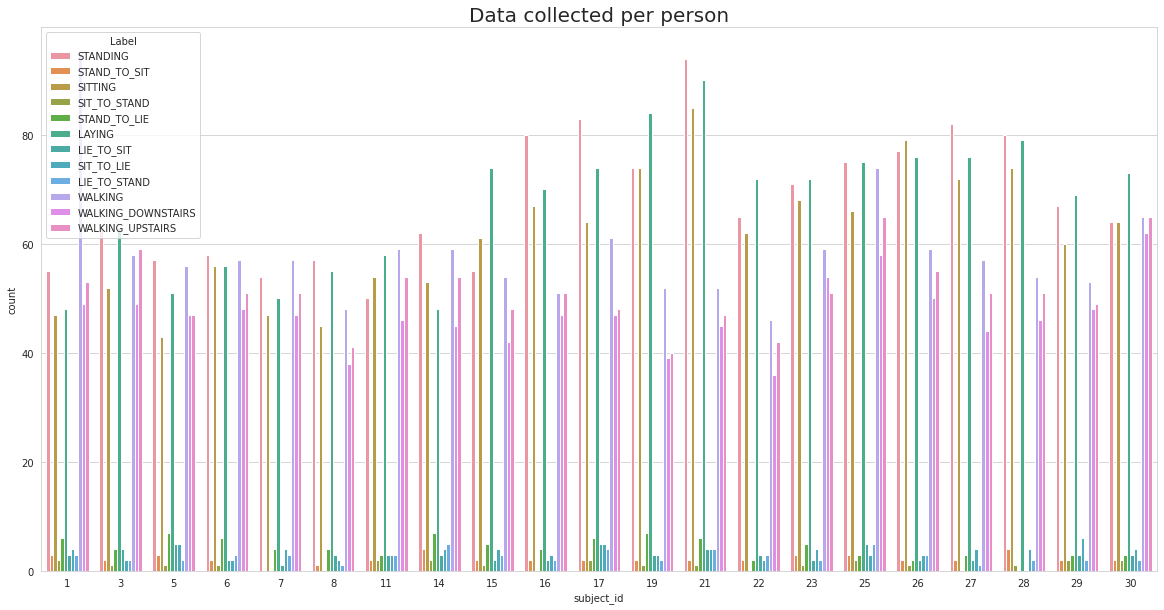

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(20,10))
plt.title('Data collected per person',fontsize=20)
sns.countplot(x='subject_id',hue='Label',data=data_vis)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

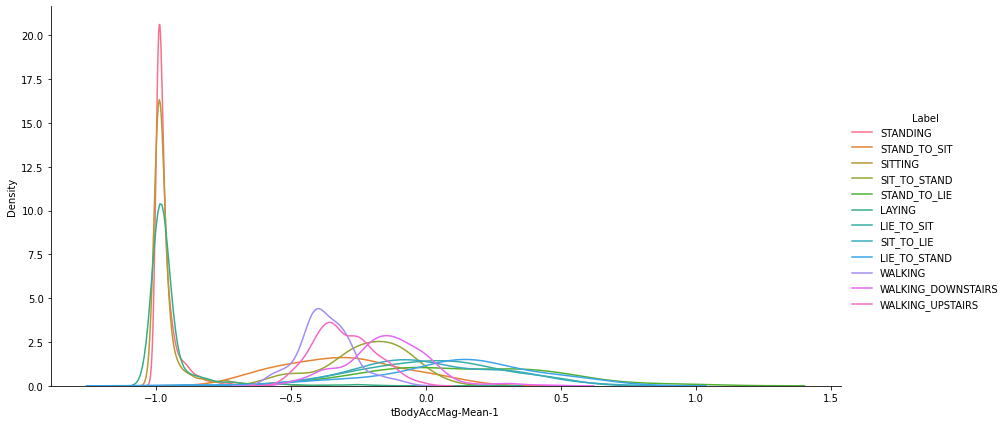

In [ ]:
sns.set_palette("Set1",desat=0.8)
facetgrid = sns.FacetGrid(train_data,hue='Label',size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-Mean-1',hist=False).add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

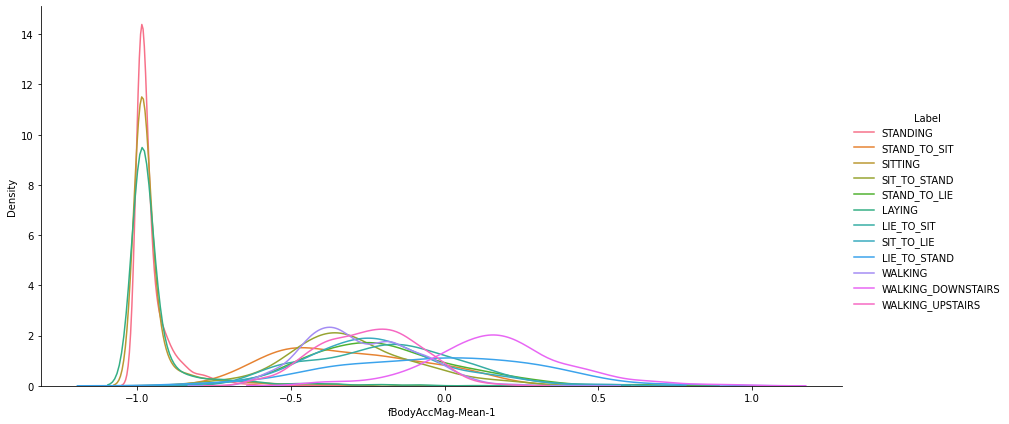

In [ ]:
sns.set_palette("Set1",desat=0.8)
facetgrid = sns.FacetGrid(train_data,hue='Label',size=6,aspect=2)
facetgrid.map(sns.distplot,'fBodyAccMag-Mean-1',hist=False).add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

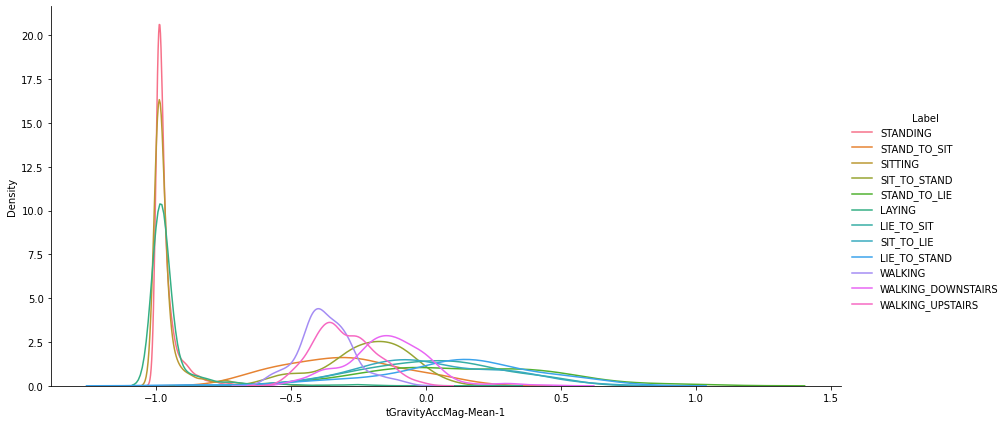

In [ ]:
sns.set_palette("Set1",desat=0.8)
facetgrid = sns.FacetGrid(train_data,hue='Label',size=6,aspect=2)
facetgrid.map(sns.distplot,'tGravityAccMag-Mean-1',hist=False).add_legend()

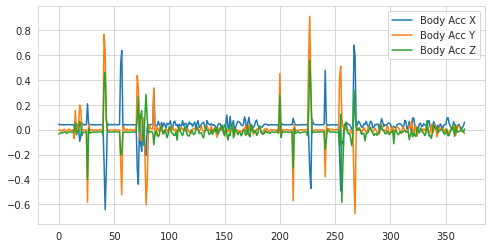

In [ ]:
subject_1 = data_vis[data_vis.subject_id == 1]
iter = np.arange(subject_1.shape[0])
plt.figure(figsize=(8,4))
plt.plot(iter,subject_1['tBodyAcc-Mean-1'],iter,subject_1['tBodyAcc-Mean-2'],iter,subject_1['tBodyAcc-Mean-3'])
plt.legend(['Body Acc X','Body Acc Y','Body Acc Z'])

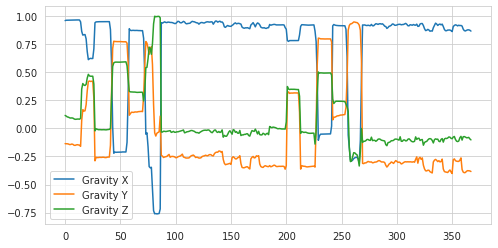

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(iter,subject_1['tGravityAcc-Mean-1'],iter,subject_1['tGravityAcc-Mean-2'],iter,subject_1['tGravityAcc-Mean-3'])
plt.legend(['Gravity X','Gravity Y','Gravity Z'])

## Feature Engineering
Idea: Get the magnitude of acceleration by taking Euclidean sum of x,y,z components. Then perform linear regression on these magnitudes.

Feature transformation is done on time series data

- Euclidean Sum of X,Y,Z components of body acceleration aka magnitude of body acceleration

- Euclidean Sum of X,Y,Z components of gravitational acceleration



In [ ]:
train_data['tBodyAcceleration'] = np.sqrt(np.square(train_data['tBodyAcc-Mean-1']) 
+ np.square(train_data['tBodyAcc-Mean-2']) 
+ np.square(train_data['tBodyAcc-Mean-3']))

train_data['fBodyAcceleration'] = np.sqrt(np.square(train_data['fBodyAcc-Mean-1'])
+ np.square(train_data['fBodyAcc-Mean-2'])
+ np.square(train_data['fBodyAcc-Mean-3']))

train_data['tGravityAcceleration'] = np.sqrt(np.square(train_data['tGravityAcc-Mean-1'])
+ np.square(train_data['tGravityAcc-Mean-2'])
+ np.square(train_data['tGravityAcc-Mean-3']))

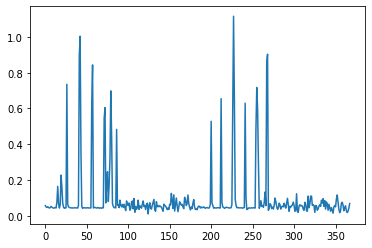

In [ ]:
subject_1 = train_data[train_data.subject_id == 1]
iter = np.arange(subject_1.shape[0])
plt.plot(iter,subject_1['tBodyAcceleration'])

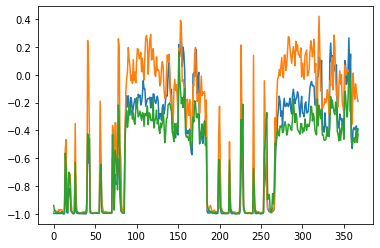

In [ ]:
subject_1 = train_data[train_data.subject_id == 1]
plt.plot(iter,subject_1['fBodyAcc-Mean-1'],iter,subject_1['fBodyAcc-Mean-2'],iter,subject_1['fBodyAcc-Mean-3'])

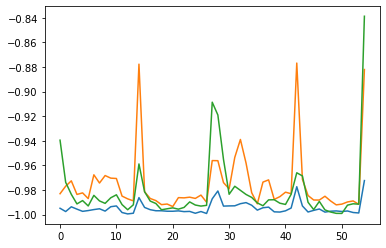

In [ ]:
subject_1_standing = subject_1[subject_1.Label == 'STANDING']
i_standing = np.arange(subject_1_standing.shape[0])
plt.plot(i_standing,subject_1_standing['fBodyAcc-Mean-1'],i_standing,subject_1_standing['fBodyAcc-Mean-2'],i_standing,subject_1_standing['fBodyAcc-Mean-3'])

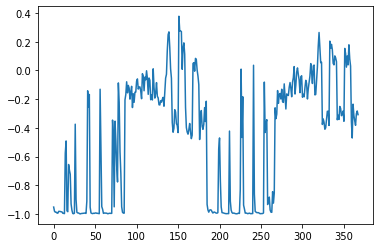

In [ ]:
plt.plot(iter,subject_1['fBodyAccMag-Mean-1'])

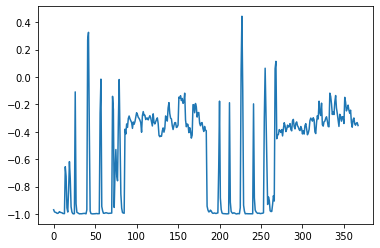

In [ ]:
plt.plot(iter,subject_1['tBodyAccMag-Mean-1'])

## Dimensionality Reduction

Utilise PCA to get more ideas on how we can perform dimensionality reduction / reduce number of features 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
x = train_data.drop('Label',axis=1)
y = train_data['Label']
pca = PCA(n_components=2)
components = pca.fit_transform(x)
componentsDF = pd.DataFrame(components,columns=['component1','component2'])

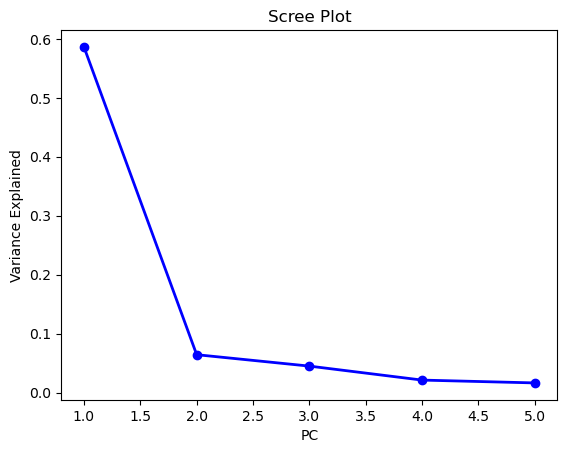

In [ ]:
x = train_data.drop('Label',axis=1)
y = train_data['Label']
pca = PCA(n_components=5)
pca_fit = pca.fit(x)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values,pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.show()

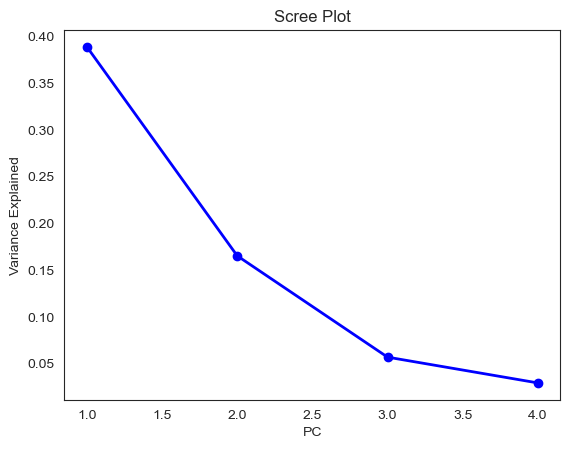

In [ ]:
bal_pca = PCA(n_components=4)
bal_pca_fit = bal_pca.fit(balanced_x_train)
bal_PC_values = np.arange(bal_pca.n_components_) + 1
plt.plot(bal_PC_values,bal_pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.show()

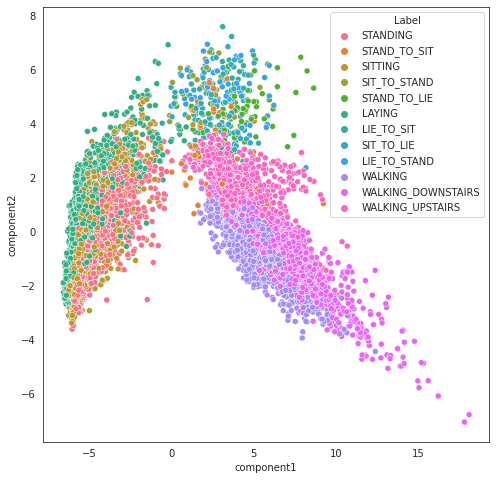

In [ ]:
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.scatterplot(x='component1',y='component2',hue=y,data=componentsDF)

<AxesSubplot:xlabel='component1', ylabel='component2'>

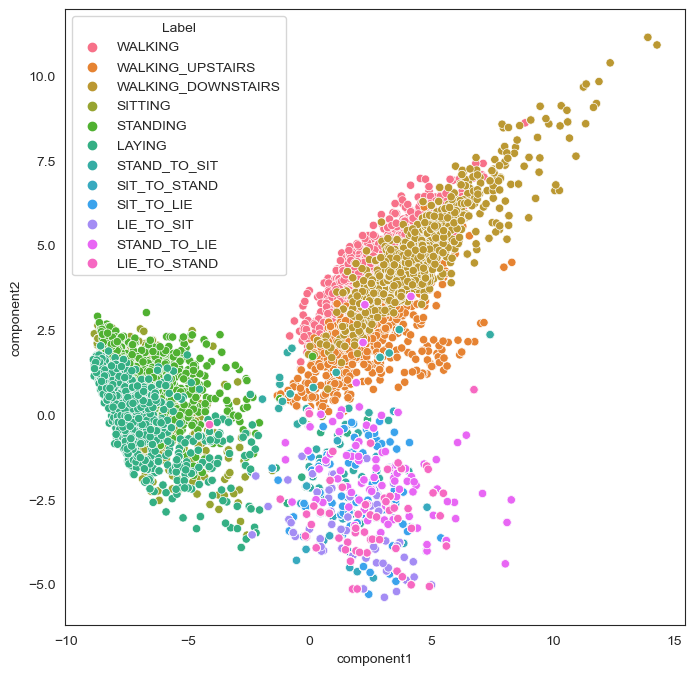

In [ ]:
bal_pca = PCA(n_components=2)
bal_y = balanced_train_data['Label']
components = bal_pca.fit_transform(balanced_x_train)
componentsDF = pd.DataFrame(components,columns=['component1','component2'])
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.scatterplot(x='component1',y='component2',hue=bal_y,data=componentsDF)

1. 2D visualisation of PCA data shows that there is clear separation btwn stationary activities and moving activities
2. PCA data visualisation does not show linearly separability of dataset

## t-distributed Stochastic Neighbour Embedding (tSNE)

A method to visualize high-dimensional data. In essence, we are looking out for clusters, so that we can conclude if the dataset is linearly separable or not. If it is, then we can use SVMs (with kernel tricks) to great effect.

In [ ]:
from sklearn.manifold import TSNE

x = train_data.drop('Label',axis=1)
y = train_data['Label']
tsne = TSNE(n_components=2,perplexity=80)
tsneComponents = tsne.fit_transform(x)
tsneDataFrame = pd.DataFrame(tsneComponents,columns=['component1','component2'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


KeyboardInterrupt: ignored

In [ ]:
tsneDataFrame.head()

component1  component2
0    0.025621  -63.733849
1  -16.622213  -32.301952
2   -7.006983  -50.393566
3  -18.628849  -33.356049
4  -15.995280  -39.897396

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.007s...
[t-SNE] Computed neighbors for 7767 samples in 3.446s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.423747
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.239288
[t-SNE] KL divergence after 5000 iterations: 1.236543


Text(0.5, 1.0, '2D Visualisation of data using tSNE with perplexity 80')

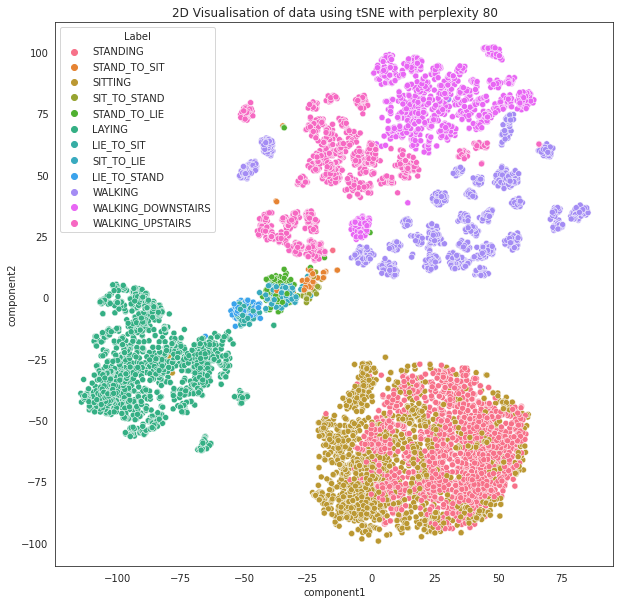

In [ ]:
# WITH 5000 ITERATIONS

from sklearn.manifold import TSNE

x = train_data.drop('Label',axis=1)
y = train_data['Label']
sns.set_style('white')
plt.figure(figsize=(10,10))
tsne = TSNE(n_components=2,perplexity=50,verbose=1, n_iter=5000)
tsneComponents = tsne.fit_transform(x)
tsneDF = pd.DataFrame(tsneComponents,columns=['component1','component2'])
sns.scatterplot(x='component1',y='component2',hue=y,data=tsneDF)
plt.xlabel('component1')
plt.ylabel('component2')
plt.title(f'2D Visualisation of data using tSNE with perplexity 80')

Text(0.5, 1.0, '2D Visualisation of data using tSNE with perplexity 80')

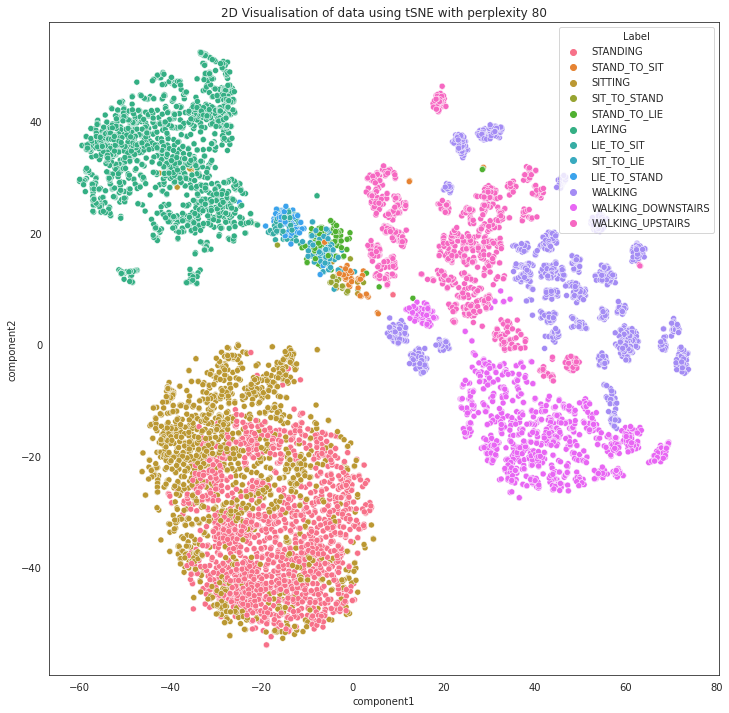

In [ ]:
sns.set_style('white')
plt.figure(figsize=(12,12))
sns.scatterplot(x='component1',y='component2',hue=y,data=tsneDF)
plt.xlabel('component1')
plt.ylabel('component2')
plt.title(f'2D Visualisation of data using tSNE with perplexity 80')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.004s...
[t-SNE] Computed neighbors for 7767 samples in 2.432s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 0.590185
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.709610
[t-SNE] KL divergence after 1000 iterations: 1.659761
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7767 samples in 2.243s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 0.948094
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.182541
[t-SNE] KL divergence after 1000 iterations: 1.589915
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7767 samples in 2.213s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.119646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.493797
[t-SNE] KL divergence after 1000 iterations: 1.517023


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.004s...
[t-SNE] Computed neighbors for 7767 samples in 2.254s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.259892
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.817940
[t-SNE] KL divergence after 1000 iterations: 1.436429
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7767 samples in 2.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.334218
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.237801
[t-SNE] KL divergence after 1000 iterations: 1.385238
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7767 samples in 2.310s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.384989
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.321060
[t-SNE] KL divergence after 1000 iterations: 1.340121
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7767 samples in 2.345s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.423747
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.317924
[t-SNE] KL divergence after 1000 iterations: 1.296065
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7767 samples in 2.354s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.455284
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.740891
[t-SNE] KL divergence after 1000 iterations: 1.261102
[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7767 samples in 2.436s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.505548
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.095078
[t-SNE] KL divergence after 1000 iterations: 1.206807
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7767 samples in 2.472s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.545663
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.925171
[t-SNE] KL divergence after 1000 iterations: 1.155901


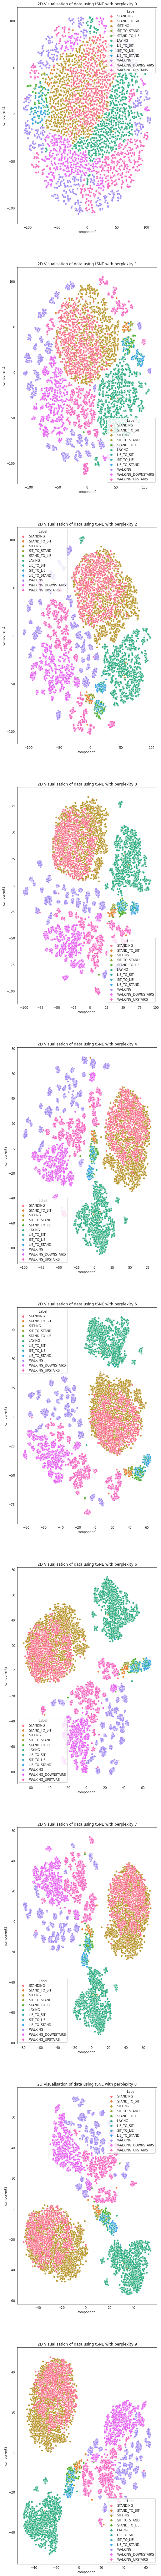

In [ ]:
perplexities = [2,5,10,20,30,40,50,60,80,100]
sns.set_style('white')
plt.figure(figsize=(8,150))
for i,p in enumerate(perplexities):
  tsne = TSNE(n_components=2,perplexity=p,verbose=1)
  tsneComponents = tsne.fit_transform(x)
  tsneDF = pd.DataFrame(tsneComponents,columns=['component1','component2'])
  plt.subplot(10,1,i+1)
  sns.scatterplot(x='component1',y='component2',hue=y,data=tsneDF)
  plt.xlabel('component1')
  plt.ylabel('component2')
  plt.title(f'2D Visualisation of data using tSNE with perplexity {i}')

**Conclusions from tSNE graph**
1. There is clear separability of classifications, especially for stationary movements
2. There is confusion between standing and sitting classification
3. For moving activities, we can get clusters but the clusters are not grouped around one another, so not as clear separability

It is possible to consider SVMs to train our model

## Further substantiation using UMAP
UMAP (Uniform Manifold Approximation & Projection) is another form of dimension reduction, its main aim is to capture the structure of the data by projecting high dimensional data into a lower dimensional plane for visualisation

In [ ]:
%pip install umap-learn
import umap.umap_ as umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 48.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=4123ff873a3f85826b05f08741e300b68c1babbb0602e1feef8af2623617ba45
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=9135e3946bc53d5c4e86494458786a28a00af871cb1a22dc2c4f80fba61af9ff
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [ ]:
# default no of neighbours = 15, play ard with no of neighbours

reducer = umap.UMAP(n_neighbors=20)
embedding = reducer.fit_transform(x)
embedding.shape

(7767, 2)

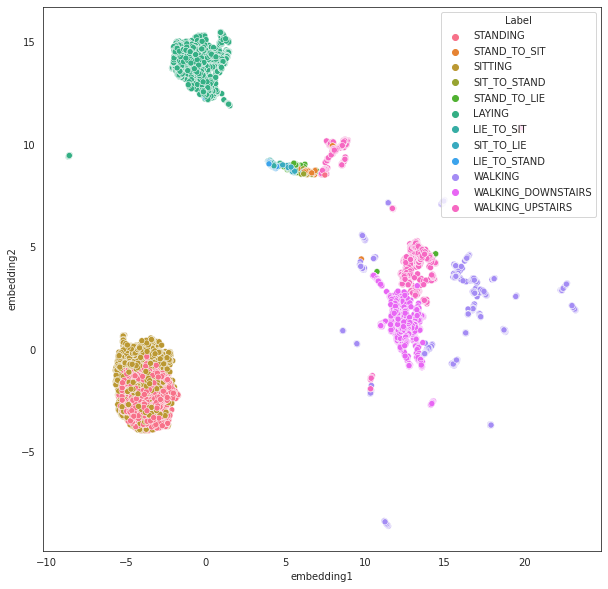

In [ ]:
e1 = embedding[:,0]
e2 = embedding[:,1]
embeddingDF = pd.DataFrame(embedding,columns=['embedding1','embedding2'])
sns.set_style('white')
plt.figure(figsize=(10,10))
sns.scatterplot(x='embedding1',y='embedding2',hue=y,data=embeddingDF)

Using balanced dataset

c:\Users\Darren Choo\AppData\Local\Programs\Python\Python38\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


<AxesSubplot:xlabel='embedding1', ylabel='embedding2'>

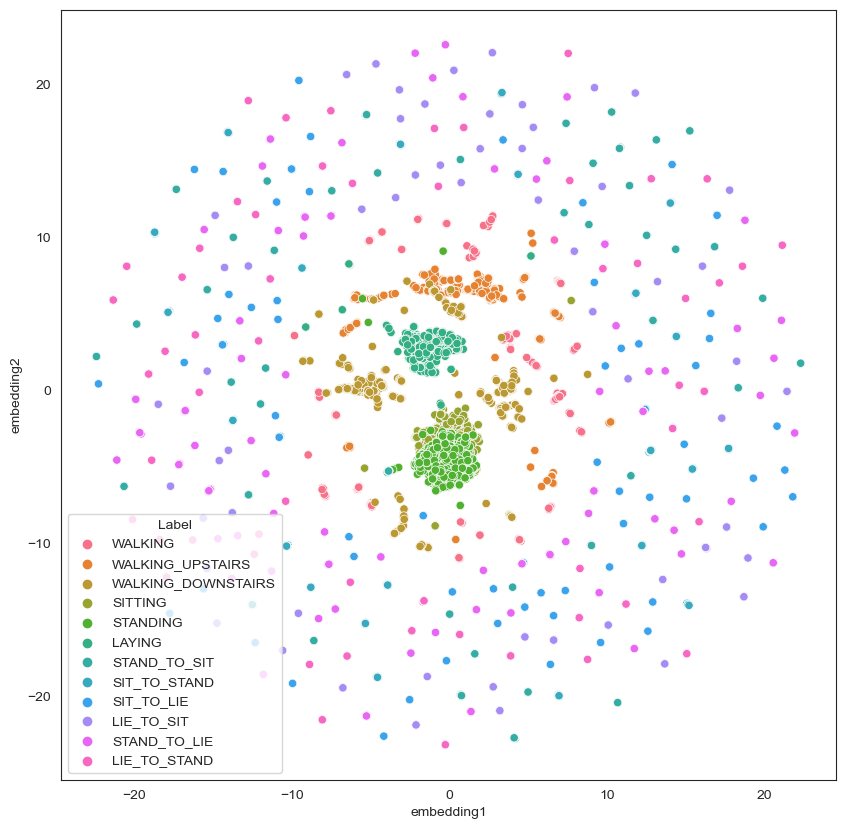

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(balanced_x_train)
e1 = embedding[:,0]
e2 = embedding[:,1]
bal_y = balanced_train_data['Label']
embeddingDF = pd.DataFrame(embedding,columns=['embedding1','embedding2'])
sns.set_style('white')
plt.figure(figsize=(10,10))
sns.scatterplot(x='embedding1',y='embedding2',hue=bal_y,data=embeddingDF)

## Building a linear classifier (base model)

Replace labels with numeric values

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
print(type(y_train))

<class 'pandas.core.series.Series'>


### Splitting data into Training, Testing and Validation set

In [4]:
X_train, X_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size=0.25,random_state=10)
#bal_x_train,bal_x_val,bal_y_train,bal_y_val = train_test_split(balanced_x_train,balanced_y_train,test_size=0.25,random_state=10)

## Logistic Regression Classifier

In [ ]:
clf = LogisticRegression(C=1, penalty='none', solver='sag')
clf.fit(X_train,y_train)
predicted_y = clf.predict(X_cv)
accuracy = accuracy_score(y_cv,predicted_y)
print(classification_report(y_cv,predicted_y))
print(accuracy_score(y_cv,predicted_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       306
           2       0.99      1.00      1.00       294
           3       1.00      0.99      1.00       245
           4       0.95      0.96      0.96       323
           5       0.97      0.96      0.96       347
           6       1.00      1.00      1.00       335
           7       0.86      0.80      0.83        15
           8       0.86      0.86      0.86         7
           9       0.77      0.53      0.62        19
          10       0.75      0.94      0.83        16
          11       0.69      0.86      0.77        21
          12       0.91      0.71      0.80        14

    accuracy                           0.97      1942
   macro avg       0.89      0.88      0.88      1942
weighted avg       0.97      0.97      0.97      1942

0.9732234809474768


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
bal_clf = LogisticRegression(C=1, penalty='none',max_iter=1000)
bal_clf.fit(bal_x_train,bal_y_train)
predicted_bal_y = bal_clf.predict(bal_x_val)
accuracy = accuracy_score(bal_y_val,predicted_bal_y)
print(classification_report(bal_y_val,predicted_bal_y))
print(accuracy_score(bal_y_val,predicted_bal_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       252
           3       1.00      1.00      1.00       304
           4       0.94      0.97      0.95       283
           5       0.97      0.94      0.96       304
           6       1.00      0.99      1.00       293
           7       1.00      1.00      1.00       243
           8       1.00      1.00      1.00       314
           9       0.99      1.00      1.00       283
          10       1.00      1.00      1.00       271
          11       1.00      1.00      1.00       288
          12       1.00      1.00      1.00       296

    accuracy                           0.99      3416
   macro avg       0.99      0.99      0.99      3416
weighted avg       0.99      0.99      0.99      3416

0.9909250585480094


In [ ]:
predicted_bal_y_test = bal_clf.predict(x_test)
test_acc = accuracy_score(y_test,predicted_bal_y_test)
print(test_acc)
print(classification_report(y_test,predicted_bal_y_test))

0.9307400379506642
              precision    recall  f1-score   support

           1       0.92      0.99      0.96       496
           2       0.98      0.90      0.94       471
           3       0.99      0.97      0.98       420
           4       0.94      0.87      0.90       508
           5       0.90      0.94      0.92       556
           6       0.99      1.00      1.00       545
           7       0.67      0.78      0.72        23
           8       0.59      1.00      0.74        10
           9       0.54      0.62      0.58        32
          10       0.65      0.68      0.67        25
          11       0.51      0.57      0.54        49
          12       0.69      0.67      0.68        27

    accuracy                           0.93      3162
   macro avg       0.78      0.83      0.80      3162
weighted avg       0.93      0.93      0.93      3162



Finding best hyperparams using GridSearchCV and RandomizedSearchCV

In [ ]:
parameters = {
    'C':[10**x for x in range(-5,4,1)],
    'penalty':['none','l1','l2','elasticnet'],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

logreg = LogisticRegression(max_iter=10000)
rando_search_LR = RandomizedSearchCV(logreg,parameters,random_state=10,verbose=2)
rando_search_LR.fit(X_train,y_train)
print(rando_search_LR.best_estimator_)
print(rando_search_LR.cv_results_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=  37.9s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=  33.9s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=  37.1s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=  38.3s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=  26.3s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.8s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.7s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.7s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.8s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.7s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ...............C=10, penalty=none, solver=newton-cg; total time=  14.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ...............C=10, penalty=none, solver=newton-cg; total time=  15.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ...............C=10, penalty=none, solver=newton-cg; total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ...............C=10, penalty=none, solver=newton-cg; total time=  15.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ...............C=10, penalty=none, solver=newton-cg; total time=  12.4s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   4.9s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   5.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   5.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   5.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .............C=0.01, penalty=none, solver=newton-cg; total time=  14.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .............C=0.01, penalty=none, solver=newton-cg; total time=  16.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .............C=0.01, penalty=none, solver=newton-cg; total time=  14.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .............C=0.01, penalty=none, solver=newton-cg; total time=  14.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .............C=0.01, penalty=none, solver=newton-cg; total time=  12.8s
[CV] END ..............C=1e-05, penalty=l2, solver=newton-cg; total time=   6.0s
[CV] END ..............C=1e-05, penalty=l2, solver=newton-cg; total time=   5.4s
[CV] END ..............C=1e-05, penalty=l2, solver=newton-cg; total time=   5.0s
[CV] END ..............C=1e-05, penalty=l2, solver=newton-cg; total time=   5.1s
[CV] END ..............C=1e-05, penalty=l2, solver=newton-cg; total time=   6.0s
[CV] END ...............C=10, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...............C=10, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...............C=10, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...............C=10, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...............C=10, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=11.5min
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='saga')
{'mean_fit_time': array([3.46884370e+01, 2.76139121e+00, 1.20485783e-02, 9.98319953e+01,
       1.40925429e+01, 4.94939971e+00, 1.46039185e+01, 5.49288692e+00,
       1.26209259e-02, 9.58258806e+02]), 'std_fit_time': array([4.49192329e+00, 6.04910501e-02, 9.76488224e-05, 1.39839631e+01,
       1.31696979e+00, 5.58974925e-02, 1.19257186e+00, 4.63700527e-01,
       2.66087091e-03, 1.82149654e+02]), 'mean_score_time': array([0.01287465, 0.01066313, 0.        , 0.0130475 , 0.01305904,
       0.00999699, 0.02288632, 0.01526332, 0.        , 0.01090989]), 'std_score_time': array([0.00023096, 0.00129443, 0.        , 0.00020972, 0.00074379,
       0.00131204, 0.00645893, 0.00517752, 0.        , 0.00172692]), 'param_solver': masked_array(data=['newton-cg', 'liblinear', 'sag', 'lbfgs', 'newton-cg',
                   'liblinear', 'newton-cg', 'newton-cg', 'sag', 'saga'],
             mask=[False, False, False, False, False, Fals

In [5]:
clf = LogisticRegression(C=1, penalty='l1', solver='saga',max_iter=10000)
clf.fit(X_train,y_train)
predicted_y = clf.predict(X_cv)
accuracy = accuracy_score(y_cv,predicted_y)
print(classification_report(y_cv,predicted_y))
print(accuracy_score(y_cv,predicted_y))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       306
           2       0.99      0.99      0.99       294
           3       1.00      1.00      1.00       245
           4       0.95      0.96      0.96       323
           5       0.97      0.96      0.96       347
           6       0.99      1.00      0.99       335
           7       0.86      0.80      0.83        15
           8       0.86      0.86      0.86         7
           9       0.79      0.58      0.67        19
          10       0.70      0.88      0.78        16
          11       0.71      0.81      0.76        21
          12       0.80      0.57      0.67        14

    accuracy                           0.97      1942
   macro avg       0.88      0.87      0.87      1942
weighted avg       0.97      0.97      0.97      1942

0.9711637487126673


In [7]:
predicted_y_test = clf.predict(x_test)
test_acc = accuracy_score(y_test,predicted_y_test)
print(test_acc)
print(classification_report(y_test,predicted_y_test,digits=3))

0.9411764705882353
              precision    recall  f1-score   support

           1      0.925     0.992     0.957       496
           2      0.950     0.928     0.939       471
           3      0.993     0.969     0.981       420
           4      0.953     0.876     0.913       508
           5      0.898     0.966     0.931       556
           6      0.998     1.000     0.999       545
           7      0.895     0.739     0.810        23
           8      1.000     0.800     0.889        10
           9      0.711     0.844     0.771        32
          10      0.679     0.760     0.717        25
          11      0.771     0.551     0.643        49
          12      0.714     0.556     0.625        27

    accuracy                          0.941      3162
   macro avg      0.874     0.832     0.848      3162
weighted avg      0.942     0.941     0.940      3162



### Trying diff values of lambda for L2 regularization

In [ ]:
lamda = [10**x for x in range(-5,4,1)]
accuracies = []
for l in lamda:
  clfLogReg = LogisticRegression(penalty='l2',C=l,n_jobs=-1)
  clfLogReg.fit(X_train,y_train)
  y_pred_LogReg = clfLogReg.predict(X_cv)
  acc = accuracy_score(y_cv,y_pred_LogReg)
  accuracies.append(acc)

In [ ]:
bestLambda = lamda[accuracies.index(max(accuracies))]
clfLogReg = LogisticRegression(penalty='l2',C=bestLambda,n_jobs=-1)
clfLogReg.fit(X_train,y_train)
y_pred_LogReg = clfLogReg.predict(X_cv)
acc = accuracy_score(y_cv,y_pred_LogReg)
print("The accuracy is: ",acc)
print(classification_report(y_cv,y_pred_LogReg))

In [ ]:
#y_test = y_test['Label'].map(mappings)
predicted_y_test = clfLogReg.predict(x_test)
test_acc = accuracy_score(y_test,predicted_y_test)
print(test_acc)
print(classification_report(y_test,predicted_y_test))

In [ ]:
parameters = {
    'C':[10**x for x in range(-5,4,1)],
    'penalty':['none','elasticnet','l1','l2'],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

logreg = LogisticRegression()
grid_search_LR = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv=10,
                           verbose=0)
grid_search_LR.fit(X_train,y_train)
print(grid_search_LR.best_estimator_)

In [ ]:
print(grid_search_LR.best_estimator_)

## Seeing if PCA decomposition improves performance on Logistic Regression Classifier

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size=0.2,random_state=10)
pca = PCA(n_components=5)
pca.fit(X_train)
x_train_pca = pca.transform(X_train)
x_cv_pca = pca.transform(X_cv)
pca_clf = LogisticRegression(penalty='l2',C=1,n_jobs=-1)
pca_clf.fit(x_train_pca,y_train)
predicted_y_pca = pca_clf.predict(x_cv_pca)

In [ ]:
print(classification_report(y_cv,predicted_y_pca))
print(accuracy_score(y_cv,predicted_y_pca))

              precision    recall  f1-score   support

           1       0.75      0.82      0.78       238
           2       0.79      0.79      0.79       239
           3       0.68      0.62      0.65       195
           4       0.80      0.69      0.74       258
           5       0.76      0.84      0.80       276
           6       0.97      0.99      0.98       278
           7       0.50      0.33      0.40         9
           8       0.50      0.20      0.29         5
           9       0.50      0.20      0.29        15
          10       0.33      0.29      0.31        14
          11       0.50      0.76      0.60        17
          12       0.36      0.50      0.42        10

    accuracy                           0.78      1554
   macro avg       0.62      0.59      0.59      1554
weighted avg       0.78      0.78      0.78      1554

0.7844272844272844


### PCA + LogReg on Test Set

In [ ]:
x_test_pca = pca.transform(x_test)
predict_pca_y_test = pca_clf.predict(x_test_pca)
pca_test_acc = accuracy_score(y_test,predict_pca_y_test)
print(pca_test_acc)
print(classification_report(y_test,predict_pca_y_test))

0.7855787476280834
              precision    recall  f1-score   support

           1       0.72      0.92      0.81       496
           2       0.86      0.81      0.83       471
           3       0.78      0.62      0.69       420
           4       0.77      0.65      0.70       508
           5       0.73      0.84      0.78       556
           6       1.00      0.97      0.98       545
           7       0.36      0.35      0.36        23
           8       0.43      0.60      0.50        10
           9       0.31      0.31      0.31        32
          10       0.52      0.56      0.54        25
          11       0.44      0.37      0.40        49
          12       0.50      0.30      0.37        27

    accuracy                           0.79      3162
   macro avg       0.62      0.61      0.61      3162
weighted avg       0.79      0.79      0.78      3162



But apparently PCA changes your best hyperparams value so I need to find best lambda again

In [ ]:
pca_lamda = [10**x for x in range(-5,4,1)]
pca_accuracies = []
X_train, X_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size=0.2,random_state=10)
pca = PCA(n_components=5)
pca.fit(X_train)
x_train_pca = pca.transform(X_train)
x_cv_pca = pca.transform(X_cv)
for l in pca_lamda:
  clfPCA = LogisticRegression(penalty='l2',C=l,n_jobs=-1)
  clfPCA.fit(x_train_pca,y_train)
  y_pred_pca = clfPCA.predict(x_cv_pca)
  acc = accuracy_score(y_cv,y_pred_pca)
  pca_accuracies.append(acc)

On Validation Set

In [ ]:
best_pca_lamda = pca_lamda[pca_accuracies.index(max(pca_accuracies))]
clfPCA = LogisticRegression(penalty='l2',C=best_pca_lamda,n_jobs=-1)
clfPCA.fit(x_train_pca,y_train)
y_pred_pca = clfPCA.predict(x_cv_pca)
acc = accuracy_score(y_cv,y_pred_pca)
print("The accuracy is: ",acc)
print(classification_report(y_cv,y_pred_pca))

The accuracy is:  0.8198198198198198
              precision    recall  f1-score   support

           1       0.84      0.88      0.86       238
           2       0.82      0.80      0.81       239
           3       0.77      0.79      0.78       195
           4       0.80      0.73      0.77       258
           5       0.79      0.83      0.81       276
           6       0.97      1.00      0.98       278
           7       0.50      0.11      0.18         9
           8       0.00      0.00      0.00         5
           9       0.43      0.20      0.27        15
          10       0.25      0.21      0.23        14
          11       0.46      0.76      0.58        17
          12       0.27      0.30      0.29        10

    accuracy                           0.82      1554
   macro avg       0.58      0.55      0.55      1554
weighted avg       0.82      0.82      0.82      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On Test Set

In [ ]:
best_pca_y_test = clfPCA.predict(x_test_pca)
best_pca_acc = accuracy_score(y_test,best_pca_y_test)
print(best_pca_acc)
print(classification_report(y_test,best_pca_y_test))

0.788741302972802
              precision    recall  f1-score   support

           1       0.73      0.92      0.81       496
           2       0.83      0.81      0.82       471
           3       0.78      0.63      0.69       420
           4       0.79      0.65      0.71       508
           5       0.73      0.85      0.79       556
           6       1.00      0.98      0.99       545
           7       0.43      0.26      0.32        23
           8       0.20      0.10      0.13        10
           9       0.32      0.31      0.32        32
          10       0.57      0.52      0.54        25
          11       0.36      0.31      0.33        49
          12       0.47      0.33      0.39        27

    accuracy                           0.79      3162
   macro avg       0.60      0.56      0.57      3162
weighted avg       0.79      0.79      0.78      3162



#### TO TRY: 
1) Perform LDA on the dataset, and use Logistic Regression Classifier on LDA transformed data
2) Use LDA classifier on dataset
WHY?: Because both might have diff performance best to try it out

#### WHY LDA?
1) Dataset is a multi-class classification problem, Logistic Regression has its limitations
2) Logistic Regression classifier can become unstable when classes are well separated (from dataset, most classes are well separated)
3) LR classifier can become unstable when there are few examples from which to est parameters (transitive motions within our dataset have little samples)
    - Can try under/oversampling to counter this problem on a normal LR classifier

#### TO DO:
Data is currently normalized
1) Transform data using Yeo-Johnson method (because values range from -1 to 1) to follow a more Gaussian Dist
2) Standardize data so that variance is the same across all features
3) Apply LDA


-> covered in sklearn LDA package

- Plot a scree plot to visualise the best number of components for LDA
- find best hyperparam to use for Logistic Regression when passing in LDA-transformed data

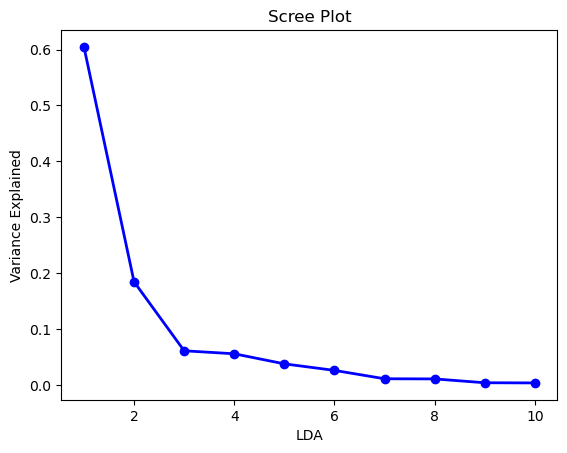

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size=0.2,random_state=10)

lda = LinearDiscriminantAnalysis(n_components=10)
lda.fit(X_train,y_train)
LDA_values = np.arange(lda.n_components) +1
plt.plot(LDA_values,lda.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('LDA')
plt.ylabel('Variance Explained')
plt.show()


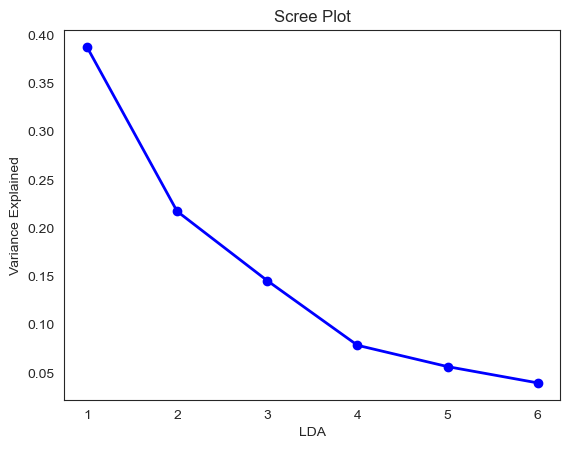

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=6)
lda.fit(bal_x_train,bal_y_train)
LDA_values = np.arange(lda.n_components) +1
plt.plot(LDA_values,lda.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('LDA')
plt.ylabel('Variance Explained')
plt.show()


By observation, consider using 7 components for LDA transformation

#### LDA Classifier

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size=0.2,random_state=10)

# transform x_train, x_cv, and x_test so that they follow a Gaussian distribution
""" gaussian_x_train = power_transform(X_train, method='yeo-johnson')
gaussian_x_cv = power_transform(X_cv,method='yeo-johnson')
gaussian_x_test = power_transform(x_test,method='yeo-johnson')

# standardize x_train, x_cv and x_test so that they have unit variance
scaler = StandardScaler()
scaler.fit(gaussian_x_train)
scaler.transform(gaussian_x_train)
scaler.fit(gaussian_x_cv)
scaler.transform(gaussian_x_cv)
scaler.fit(gaussian_x_test)
scaler.transform(gaussian_x_test) """

lda_clf = LinearDiscriminantAnalysis(n_components=7)
lda_clf.fit(X_train,y_train)
lda_pred_y = lda_clf.predict(X_cv)
print(accuracy_score(lda_pred_y,y_cv))
print(classification_report(lda_pred_y,y_cv))

0.9755469755469756
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       238
           2       0.99      0.99      0.99       240
           3       0.99      0.99      0.99       194
           4       0.97      0.96      0.97       260
           5       0.97      0.98      0.97       273
           6       1.00      0.99      0.99       280
           7       1.00      0.90      0.95        10
           8       0.80      1.00      0.89         4
           9       0.73      0.79      0.76        14
          10       0.71      0.83      0.77        12
          11       0.71      0.75      0.73        16
          12       0.90      0.69      0.78        13

    accuracy                           0.98      1554
   macro avg       0.90      0.91      0.90      1554
weighted avg       0.98      0.98      0.98      1554



Performance on test set

In [ ]:
lda_pred_y_test = lda_clf.predict(x_test)
print(accuracy_score(lda_pred_y_test,y_test))
print(classification_report(lda_pred_y_test,y_test))

0.948450347881088
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       502
           2       0.97      0.95      0.96       483
           3       0.96      1.00      0.98       402
           4       0.88      0.95      0.91       473
           5       0.96      0.90      0.93       592
           6       1.00      1.00      1.00       546
           7       0.96      0.71      0.81        31
           8       1.00      1.00      1.00        10
           9       0.75      0.73      0.74        33
          10       0.56      0.70      0.62        20
          11       0.67      0.80      0.73        41
          12       0.70      0.66      0.68        29

    accuracy                           0.95      3162
   macro avg       0.87      0.86      0.86      3162
weighted avg       0.95      0.95      0.95      3162



Using LDA transformed dataset on Logistic Regression Classifier

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size=0.2,random_state=10)

lda_logreg = LinearDiscriminantAnalysis(n_components=7)
lda_logreg.fit(X_train,y_train)
x_train_lda = lda_logreg.transform(X_train)
x_cv_lda = lda_logreg.transform(X_cv)
logreg_LDA = LogisticRegression(C=1, penalty='none', solver='sag')
logreg_LDA.fit(x_train_lda,y_train)
predicted_y_lda = logreg_LDA.predict(x_cv_lda)
print(accuracy_score(y_cv,predicted_y_lda))
print(classification_report(y_cv,predicted_y_lda))

0.9601029601029601
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       238
           2       0.99      0.99      0.99       239
           3       0.99      0.99      0.99       195
           4       0.93      0.96      0.94       258
           5       0.97      0.93      0.95       276
           6       1.00      1.00      1.00       278
           7       0.88      0.78      0.82         9
           8       1.00      1.00      1.00         5
           9       0.50      0.53      0.52        15
          10       0.67      0.43      0.52        14
          11       0.59      0.59      0.59        17
          12       0.47      0.70      0.56        10

    accuracy                           0.96      1554
   macro avg       0.83      0.82      0.82      1554
weighted avg       0.96      0.96      0.96      1554



c:\Users\Darren Choo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Predicting on test set

In [ ]:
x_test_lda = lda_logreg.transform(x_test)
predict_y_test_lda = logreg_LDA.predict(x_test_lda)
print(accuracy_score(y_test,predict_y_test_lda))
print(classification_report(y_test,predict_y_test_lda))

0.9389626818469323
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.97      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.93      0.88      0.90       508
           5       0.89      0.94      0.92       556
           6       1.00      1.00      1.00       545
           7       0.67      0.78      0.72        23
           8       1.00      1.00      1.00        10
           9       0.56      0.56      0.56        32
          10       0.50      0.48      0.49        25
          11       0.67      0.65      0.66        49
          12       0.46      0.44      0.45        27

    accuracy                           0.94      3162
   macro avg       0.80      0.81      0.80      3162
weighted avg       0.94      0.94      0.94      3162



Using LDA on balanced dataset

In [ ]:
# Using LDA classifier

bal_lda_clf = LinearDiscriminantAnalysis(n_components=4)
bal_lda_clf.fit(bal_x_train,bal_y_train)
bal_lda_pred_y = bal_lda_clf.predict(bal_x_val)
print(accuracy_score(bal_lda_pred_y,bal_y_val))
print(classification_report(bal_lda_pred_y,bal_y_val))

0.9806791569086651
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       280
           2       1.00      0.97      0.98       260
           3       0.99      1.00      1.00       301
           4       0.93      0.93      0.93       282
           5       0.94      0.94      0.94       302
           6       0.99      0.99      0.99       293
           7       1.00      1.00      1.00       243
           8       1.00      1.00      1.00       314
           9       1.00      0.96      0.98       296
          10       0.98      1.00      0.99       265
          11       0.97      1.00      0.98       278
          12       1.00      0.98      0.99       302

    accuracy                           0.98      3416
   macro avg       0.98      0.98      0.98      3416
weighted avg       0.98      0.98      0.98      3416



In [ ]:
# Using LDA Classifier on test set
bal_lda_pred_y_test = bal_lda_clf.predict(x_test)
print(accuracy_score(bal_lda_pred_y_test,y_test))
print(classification_report(bal_lda_pred_y_test,y_test))

0.9411764705882353
              precision    recall  f1-score   support

           1       0.98      0.97      0.97       498
           2       0.97      0.92      0.95       498
           3       0.92      1.00      0.96       388
           4       0.87      0.96      0.91       461
           5       0.96      0.90      0.93       596
           6       1.00      1.00      1.00       544
           7       0.96      0.69      0.80        32
           8       1.00      0.91      0.95        11
           9       0.84      0.66      0.74        41
          10       0.60      0.65      0.63        23
          11       0.69      0.79      0.74        43
          12       0.67      0.67      0.67        27

    accuracy                           0.94      3162
   macro avg       0.87      0.84      0.85      3162
weighted avg       0.94      0.94      0.94      3162



In [ ]:
# Using LDA transformed dataset on LR classifier

bal_lda_logreg = LinearDiscriminantAnalysis(n_components=4)
bal_lda_logreg.fit(bal_x_train,bal_y_train)
bal_x_train_lda = bal_lda_logreg.transform(bal_x_train)
bal_x_val_lda = bal_lda_logreg.transform(bal_x_val)
bal_logreg_LDA = LogisticRegression(C=1, penalty='none',max_iter=10000)
bal_logreg_LDA.fit(bal_x_train_lda,bal_y_train)
bal_predicted_y_lda = bal_logreg_LDA.predict(bal_x_val_lda)
print(accuracy_score(bal_y_val,bal_predicted_y_lda))
print(classification_report(bal_y_val,bal_predicted_y_lda))

0.7678571428571429
              precision    recall  f1-score   support

           1       0.76      0.70      0.73       285
           2       0.75      0.82      0.78       252
           3       0.89      0.88      0.89       304
           4       0.60      0.55      0.57       283
           5       0.61      0.65      0.63       304
           6       1.00      0.99      0.99       293
           7       1.00      1.00      1.00       243
           8       1.00      1.00      1.00       314
           9       0.58      0.56      0.57       283
          10       0.73      0.67      0.70       271
          11       0.59      0.61      0.60       288
          12       0.72      0.78      0.75       296

    accuracy                           0.77      3416
   macro avg       0.77      0.77      0.77      3416
weighted avg       0.77      0.77      0.77      3416



In [ ]:
# Testing on test set
x_test_lda = bal_lda_logreg.transform(x_test)
bal_predict_y_test_lda = bal_logreg_LDA.predict(x_test_lda)
print(accuracy_score(y_test,bal_predict_y_test_lda))
print(classification_report(y_test,bal_predict_y_test_lda))


0.726122707147375
              precision    recall  f1-score   support

           1       0.69      0.63      0.65       496
           2       0.71      0.85      0.77       471
           3       0.86      0.78      0.81       420
           4       0.57      0.60      0.58       508
           5       0.62      0.59      0.60       556
           6       1.00      1.00      1.00       545
           7       0.64      0.70      0.67        23
           8       1.00      1.00      1.00        10
           9       0.37      0.59      0.45        32
          10       0.52      0.48      0.50        25
          11       0.65      0.31      0.42        49
          12       0.52      0.52      0.52        27

    accuracy                           0.73      3162
   macro avg       0.68      0.67      0.67      3162
weighted avg       0.73      0.73      0.73      3162

